In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

#read in datafile, convert to dataframe
data = pd.DataFrame(pd.read_csv('Resources/crime-data.csv', low_memory=False)).drop(['100 BLOCK ADDR', 'OCCURRED TO'], axis=1)

#datatypes
data['INC NUMBER'] = data['INC NUMBER'].apply(str).replace('\.0', '', regex=True)
data['OCCURRED ON'] = data['OCCURRED ON'].astype(str)
data['UCR CRIME CATEGORY'] = data['UCR CRIME CATEGORY'].astype(str)
data['ZIP'] = data['ZIP'].apply(str).replace('\.0', '', regex=True)
data['PREMISE TYPE'] = data['PREMISE TYPE'].astype(str)

#regroup/rename
data.loc[data['PREMISE TYPE'] == '07A STOREROOM/SHED (COMMERCIAL)', ['PREMISE TYPE']] = 'STOREROOM / SHED'
data.loc[data['PREMISE TYPE'] == '07A STOREROOM/SHED (RESIDENTIAL)', ['PREMISE TYPE']] = 'STOREROOM / SHED'
data.loc[data['PREMISE TYPE'] == 'BAR / LOUNG / NIGHT CLUB', ['PREMISE TYPE']] = 'BAR / LOUNGE / NIGHTCLUB'
data.loc[data['PREMISE TYPE'] == 'GARAGE / CARPORT', ['PREMISE TYPE']] = 'GARAGE'
data.loc[data['PREMISE TYPE'] == 'CARPORT', ['PREMISE TYPE']] = 'GARAGE'
data.loc[data['PREMISE TYPE'] == 'BUS', ['PREMISE TYPE']] = 'ON THE BUS'
data.loc[data['PREMISE TYPE'] == 'FAST FOOD STORE', ['PREMISE TYPE']] = 'RESTAURANT'
data.loc[data['PREMISE TYPE'] == 'FOJ - PREMISE UNKNOWN', ['PREMISE TYPE']] = 'UNKNOWN'
data.loc[data['PREMISE TYPE'] == 'HOSPITAL', ['PREMISE TYPE']] = 'HOSPITAL / NURSING CARE'
data.loc[data['PREMISE TYPE'] == 'SCHOOL-COLLEGE/UNIVERSITY', ['PREMISE TYPE']] = 'SCHOOL/COLLEGE/CHILDCARE'
data.loc[data['PREMISE TYPE'] == 'SCHOOL-ELEMENTARY/SECONDARY', ['PREMISE TYPE']] = 'SCHOOL/COLLEGE/CHILDCARE'
data.loc[data['PREMISE TYPE'] == 'SCHOOL-OTHER', ['PREMISE TYPE']] = 'SCHOOL/COLLEGE/CHILDCARE'
data.loc[data['PREMISE TYPE'] == 'SINGLE FAMILY HOUSING', ['PREMISE TYPE']] = 'SINGLE FAMILY HOUSE'
data.loc[data['PREMISE TYPE'] == 'STREET / ROADWAY / ALLEY SIDEWALK', ['PREMISE TYPE']] = 'STREET / ROADWAY / ALLEY / SIDEWALK'
data.loc[data['PREMISE TYPE'] == 'RAIL STATION', ['PREMISE TYPE']] = 'TRAIN STATION'
data.loc[data['PREMISE TYPE'] == 'WAREHOUSE / FACTORY', ['PREMISE TYPE']] = 'INDUSTRIAL SITE'

#clean up data
data = data[data['PREMISE TYPE'] != 'NaN']
data = data[data['PREMISE TYPE'] != '']
data = data[data['ZIP'] != 'NaN']
data = data[data['ZIP'] != '']
data = data[data['OCCURRED ON'] != 'NaN']
data = data[data['OCCURRED ON'] != '']
#data = data[data['INC NUMBER'] != 'NaN'
#data = data[data['INC NUMBER'] != '']
data = data[data['UCR CRIME CATEGORY'] != 'NaN']

data['OCCURRED ON'] = pd.to_datetime(data['OCCURRED ON'])


data.head()

,INC NUMBER,OCCURRED ON,UCR CRIME CATEGORY,ZIP,PREMISE TYPE
0,201500000000000,2015-11-01,MOTOR VEHICLE THEFT,85307,SINGLE FAMILY HOUSE
1,201500000000000,2015-11-01,MOTOR VEHICLE THEFT,85043,SINGLE FAMILY HOUSE
2,201600000000000,2015-11-01,MOTOR VEHICLE THEFT,85029,SINGLE FAMILY HOUSE
3,201500000000000,2015-11-01,LARCENY-THEFT,85014,PARKING LOT
4,201700000000000,2015-11-01,LARCENY-THEFT,85085,SINGLE FAMILY HOUSE


In [2]:

#parse & add columns for year/month/day 
YEAR = data['INC NUMBER'].str[:4].astype(int)
data['YEAR'] = YEAR.fillna(0.0).astype(int)
#data = data.rename(columns = {'INC NUMBER':'YEAR'})

MONTH = data['OCCURRED ON'].dt.month
DAY = data['OCCURRED ON'].dt.day

#data['occurred_on_year'] = occurred_on_year.fillna(0.0).astype(int)
data['MONTH'] = MONTH.fillna(0.0).astype(int)
data['DAY'] = DAY.fillna(0.0).astype(int)

#drop unnecessary column
#data.drop(columns='INC NUMBER', inplace=True)

data.head()

,INC NUMBER,OCCURRED ON,UCR CRIME CATEGORY,ZIP,PREMISE TYPE,YEAR,MONTH,DAY
0,201500000000000,2015-11-01,MOTOR VEHICLE THEFT,85307,SINGLE FAMILY HOUSE,2015,11,1
1,201500000000000,2015-11-01,MOTOR VEHICLE THEFT,85043,SINGLE FAMILY HOUSE,2015,11,1
2,201600000000000,2015-11-01,MOTOR VEHICLE THEFT,85029,SINGLE FAMILY HOUSE,2016,11,1
3,201500000000000,2015-11-01,LARCENY-THEFT,85014,PARKING LOT,2015,11,1
4,201700000000000,2015-11-01,LARCENY-THEFT,85085,SINGLE FAMILY HOUSE,2017,11,1


In [55]:
data = data[data['YEAR'] > 2015] 
data.head()

,INC NUMBER,OCCURRED ON,UCR CRIME CATEGORY,ZIP,PREMISE TYPE,YEAR,MONTH,DAY
2,201600000000000,2015-11-01,MOTOR VEHICLE THEFT,85029,SINGLE FAMILY HOUSE,2016,11,1
4,201700000000000,2015-11-01,LARCENY-THEFT,85085,SINGLE FAMILY HOUSE,2017,11,1
5,201700000000000,2015-11-01,RAPE,85019,HOSPITAL / NURSING CARE,2017,11,1
7,201600000000000,2015-11-01,RAPE,85006,SINGLE FAMILY HOUSE,2016,11,1
9,201600000000000,2015-11-01,LARCENY-THEFT,85017,PARKING LOT,2016,11,1


In [56]:
data.describe()

,YEAR,MONTH,DAY
count,243738.000000,243738.000000,243738.000000
mean,2017.416107,6.223826,15.580902
std,1.080821,3.365206,8.844523
min,2016.000000,0.000000,0.000000
25%,2016.000000,3.000000,8.000000
50%,2017.000000,6.000000,16.000000
75%,2018.000000,9.000000,23.000000
max,2019.000000,12.000000,31.000000


In [57]:
#crime_data_df.dtypes
data.dtypes


INC NUMBER                    object
OCCURRED ON           datetime64[ns]
UCR CRIME CATEGORY            object
ZIP                           object
PREMISE TYPE                  object
YEAR                           int32
MONTH                          int32
DAY                            int32
dtype: object

In [58]:
data['UCR CRIME CATEGORY'].value_counts()

LARCENY-THEFT                            123858
BURGLARY                                  38840
MOTOR VEHICLE THEFT                       25706
DRUG OFFENSE                              20552
AGGRAVATED ASSAULT                        18748
ROBBERY                                   10386
RAPE                                       3622
ARSON                                      1537
MURDER AND NON-NEGLIGENT MANSLAUGHTER       489
Name: UCR CRIME CATEGORY, dtype: int64

In [59]:
data['PREMISE TYPE'].value_counts().head(10)

SINGLE FAMILY HOUSE                    44710
APARTMENT                              27909
STREET / ROADWAY / ALLEY / SIDEWALK    25544
PARKING LOT                            24402
RETAIL BUSINESS                        18481
VEHICLE                                12634
CONVENIENCE MARKET / STORE              8886
DEPARTMENT / DISCOUNT STORE             8677
DRIVEWAY                                8542
GROCERY / SUPER MARKET                  6647
Name: PREMISE TYPE, dtype: int64

In [60]:
#parse by year
is_2015 =  data['YEAR']==2015
data_2015 = data[is_2015]

is_2016 =  data['YEAR']==2016
data_2016 = data[is_2016]

is_2017 =  data['YEAR']==2017
data_2017 = data[is_2017]

is_2018 =  data['YEAR']==2018
data_2018 = data[is_2018]

is_2019 =  data['YEAR']==2019
data_2019 = data[is_2019]



In [81]:

# Using GroupBy in order to separate the data into fields according to "state" values



cattype = data.groupby(['UCR CRIME CATEGORY', 'PREMISE TYPE']).count()[['OCCURRED ON']].sort_values(['UCR CRIME CATEGORY','OCCURRED ON'], ascending=False)#.nlargest(5,'OCCURRED ON')

#cattype = cattype.reset_index().sort_values(['UCR CRIME CATEGORY','OCCURRED ON'],ascending=False).set_index(['UCR CRIME CATEGORY','PREMISE TYPE'])

#cattype = cattype.sort_values(by=['OCCURRED ON'], ascending=False)

cattype


OCCURRED ON
UCR CRIME CATEGORY PREMISE TYPE                                    
ROBBERY            STREET / ROADWAY / ALLEY / SIDEWALK         2643
                   PARKING LOT                                 1512
                   CONVENIENCE MARKET / STORE                  1281
                   APARTMENT                                    576
                   RESTAURANT                                   544
                   VEHICLE                                      413
                   SPECIALTY STORE                              400
                   SINGLE FAMILY HOUSE                          374
                   PARK / PLAYGROUND                            361
                   DEPARTMENT / DISCOUNT STORE                  317
                   RETAIL BUSINESS                              287
                   BUS STOP                                     265
                   GROCERY / SUPER MARKET                       209
                   HOTEL / MOTEL                                197
                   BANK / SAVINGS / CREDIT UNION                175
                   DRUG STORE                                   132
                   GAS / SERVICE STATION                        114
                   DRIVEWAY                                      61
                   LIGHT RAIL PLATFORM                           44
                   OFFICE / COMMERCIAL BUILDING                  31
                   CONDO / TOWNHOUSE                             30
                   OTHER                                         30
                   BAR / LOUNGE / NIGHTCLUB                      28
                   LIGHT RAIL                                    24
                   CANAL / RIGHT-OF-WAY                          22
                   LIQUOR STORE                                  20
                   nan                                           20
                   ON THE BUS                                    19
                   ATM SEPARATE FROM BANK                        18
                   MOBILE HOME                                   18
...                                                             ...
AGGRAVATED ASSAULT SHELTER-MISSION/HOMELESS                      21
                   PARKING GARAGE                                20
                   BUS STATION                                   16
                   GOVERNMENT / PUBLIC BUILDING                  16
                   MEDICAL OFFICE                                12
                   FIELD/WOODS                                   10
                   TRAIN STATION                                 10
                   AUTO DEALERSHIP NEW/USED                       9
                   CHILD CARE / DAY CARE                          9
                   ABANDONED/CONDEMNED STRUCTURE                  8
                   BANK / SAVINGS / CREDIT UNION                  8
                   CONSTRUCTION SITE                              8
                   JAIL / PRISON / PENITENTIARY                   8
                   STOREROOM / SHED                               8
                   ARENA / STADIUM / CONVENTION CENTER            7
                   ADULT ONLY STORE / MOVIE                       6
                   LIGHT RAIL FACILITY                            6
                   RENTAL STORAGE / FACILITY                      6
                   COMMUNITY CENTER                               5
                   THEATRE                                        5
                   BUS FACILITY                                   4
                   RIVER BOTTOM                                   4
                   AMUSEMENT PARK                                 2
                   CAMP/CAMPGROUND                                2
                   MOUNTAIN AREA                                  2
                   DRIVE-IN MOVIE                                 1
                   EASEMENT                 

In [ ]:
cattype = data.groupby(['UCR CRIME CATEGORY', 'PREMISE TYPE']).count()[['OCCURRED ON']].sort_values(['UCR CRIME CATEGORY','OCCURRED ON'], ascending=False)#.nlargest(5,'OCCURRED ON')

#cattype = cattype.reset_index().sort_values(['UCR CRIME CATEGORY','OCCURRED ON'],ascending=False).set_index(['UCR CRIME CATEGORY','PREMISE TYPE'])

#cattype = cattype.sort_values(by=['OCCURRED ON'], ascending=False)

cattype

In [88]:
premtype = data.groupby(['PREMISE TYPE']).count()[['OCCURRED ON']]

#cattype = cattype.reset_index().sort_values(['UCR CRIME CATEGORY','OCCURRED ON'],ascending=False).set_index(['UCR CRIME CATEGORY','PREMISE TYPE'])

premtype = premtype.sort_values(by=['OCCURRED ON'], ascending=False)

premtype.head()

,OCCURRED ON
PREMISE TYPE,
SINGLE FAMILY HOUSE,44649
APARTMENT,27882
STREET / ROADWAY / ALLEY / SIDEWALK,25510
PARKING LOT,24370
RETAIL BUSINESS,18448


Text(0.5, 1.0, 'Crime Category Occurrences by Year')

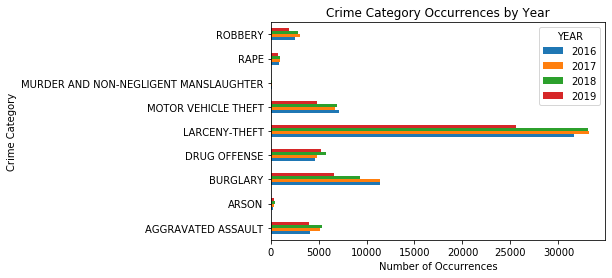

In [83]:

catyear = data.groupby(['YEAR','UCR CRIME CATEGORY']).count()['OCCURRED ON'].reset_index()
catyearpivot = catyear.pivot(index='UCR CRIME CATEGORY', columns='YEAR', values='OCCURRED ON')
catyearpivot.plot(kind='barh')
plt.xlabel("Number of Occurrences")
plt.ylabel("Crime Category")
plt.title("Crime Category Occurrences by Year")


Text(0.5, 1.0, 'Crime Occurrences by Zip Code (Top 20)')

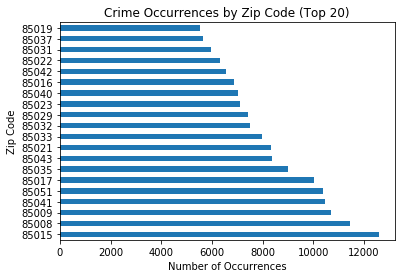

In [78]:
#total by zip
datazip = data["ZIP"].groupby(data["ZIP"]).count().sort_values(ascending=False)
datazip.head(20).plot(kind="barh")
plt.xlabel("Number of Occurrences")
plt.ylabel("Zip Code")
plt.title("Crime Occurrences by Zip Code (Top 20)")


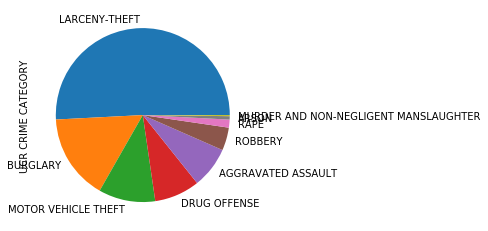

In [84]:
#total by type
datacat = data["UCR CRIME CATEGORY"].groupby(data["UCR CRIME CATEGORY"]).count().sort_values(ascending=False)
datacat.plot(kind="pie")

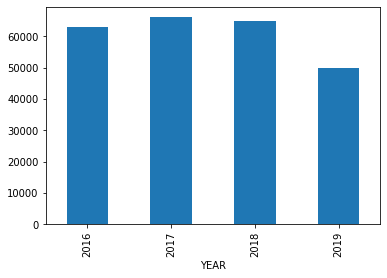

In [67]:
datapremtype = data["YEAR"].groupby(data["YEAR"]).count()
datapremtype.plot(kind="bar")

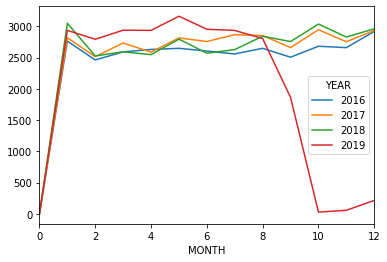

In [68]:
#larceny (highest crime) by month
larceny =  data['UCR CRIME CATEGORY']=="LARCENY-THEFT"
datalarceny = data[larceny]

crimemonth = datalarceny.groupby(['YEAR','MONTH']).count()['OCCURRED ON'].reset_index()

crimemonthpivot = crimemonth.pivot(index='MONTH', columns='YEAR', values='OCCURRED ON')
crimemonthpivot.plot(kind='line')


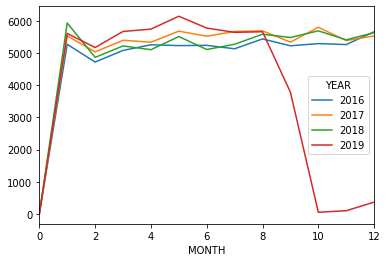

In [85]:
#all crime by month
allcrimemonth = data.groupby(['YEAR','MONTH']).count()['OCCURRED ON'].reset_index()

allcrimemonth = allcrimemonth.pivot(index='MONTH', columns='YEAR', values='OCCURRED ON')
allcrimemonth.plot(kind='line')